# KEGG Pathway Metrics

We will characterize the system response given a set of genes using the KEGG pathways.

# Libraries

In [11]:
# Libraries


# KGML files
from bs4 import BeautifulSoup

# Deep copying
# Source: https://stackoverflow.com/a/2465951
import copy

# globbing
from glob import glob

# Interweaving
import itertools

# JSON
import json

# Plotting
import networkx as nx
import matplotlib.pyplot as plt

# Pandas
import pandas as pd

In [12]:
# Set the data folder.
data_folder = '/media/apollo/Samsung_T5/transfer/mayur/'

# KGML files

First, read in all KGML files.

In [13]:
# KGML files.
kgml_files = glob(data_folder + '/kgml_files/*.xml')

# Read them all in.
kgmls = {}

for kgml_file in kgml_files:
    
    # Get the pathway name.
    pathway_name = kgml_file.split('/')[-1].split('.')[0]
    
    # Read the file.
    with open(kgml_file, 'r') as f:
        
        read_in = ''.join([i.strip() for i in f.readlines()])
        
        # Parse.
        kgmls[pathway_name] = BeautifulSoup(read_in, 'lxml')

/tmp/ipykernel_11952/2210048267.py:18: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  kgmls[pathway_name] = BeautifulSoup(read_in, 'lxml')


Find all possible types of relations and all possible types of entries.

In [14]:
# Relation types.
relation_types = {}

# Entry types.
entry_types = []

# Go over every pathway.
for pathway_id in kgmls.keys():
    
    # Relations.
    for i in kgmls[pathway_id].find_all('subtype'):
    
        # Check to see if we've already
        # had this type.
        if i['name'] not in relation_types:
            relation_types[i['name']] = i['value']
    
    # Entries.
    for i in kgmls[pathway_id].find_all('entry'):
    
        # Check to see if we've already
        # had this type.
        if i['type'] not in entry_types:
            entry_types.append(i['type'])

In [15]:
relation_types

{'inhibition': '--|',
 'activation': '-->',
 'indirect effect': '..>',
 'expression': '-->',
 'compound': '7',
 'binding/association': '---',
 'phosphorylation': '+p',
 'dissociation': '-+-',
 'missing interaction': '-/-',
 'repression': '--|',
 'dephosphorylation': '-p',
 'glycosylation': '+g',
 'ubiquitination': '+u',
 'indirect': '',
 'state change': '...',
 'methylation': '+m'}

In [16]:
entry_types

['map', 'gene', 'compound', 'ortholog', 'group']

# Metrics (aggregate)

Begin by getting every entity in every pathway.

In [17]:
# Get every entity of every pathway.
entities_by_pathway = {}

# Go over every pathway.
for pathway_id in kgmls.keys():
    
    # Add the key.
    entities_by_pathway[pathway_id] = []
    
    # Now the entities for this pathway.    
    for i in kgmls[pathway_id].find_all('entry'):
        for j in i['name'].split(' '):
            entities_by_pathway[pathway_id].append(j)

In [18]:
# entities_by_pathway

Now do pairwise comparisons between pathways.

In [19]:
# Pairwise comparisons.
pairwise_comparisons = {}

# Keep track of how many connections each
# pathway has.
n_connections_by_pathway = {}

# Go over every pairwise combination
# of pathways.
for index_one in range(0, len(entities_by_pathway.keys())):    
    for index_two in range(index_one + 1, len(entities_by_pathway.keys())):
        
        # Define the pathways.
        first_pathway_key = list(entities_by_pathway.keys())[index_one]
        second_pathway_key =  list(entities_by_pathway.keys())[index_two]
        
        # Load the pathways.
        first_pathway = entities_by_pathway[first_pathway_key]
        second_pathway = entities_by_pathway[second_pathway_key]
        
        # Anything shared?
        shared = set(first_pathway).intersection(set(second_pathway))
        
        # Update the number of connections.
        if first_pathway_key not in n_connections_by_pathway:
            n_connections_by_pathway[first_pathway_key] = 0
        else:
            n_connections_by_pathway[first_pathway_key] += len(shared)
        
        if second_pathway_key not in n_connections_by_pathway:
            n_connections_by_pathway[second_pathway_key] = 0
        else:
            n_connections_by_pathway[second_pathway_key] += len(shared)
        
        if len(shared) > 0:
            
            # Set the key.
            pairwise_comparisons[first_pathway_key + '-' + second_pathway_key] = shared

In [20]:
pairwise_comparisons

{'hsa01523-hsa05212': {'hsa:1147',
  'hsa:3551',
  'hsa:4790',
  'hsa:5970',
  'hsa:8517'},
 'hsa01523-hsa05221': {'hsa:1147',
  'hsa:3551',
  'hsa:4790',
  'hsa:5970',
  'hsa:8517'},
 'hsa01523-hsa05340': {'hsa:8517'},
 'hsa01523-hsa04931': {'hsa:3551',
  'hsa:3569',
  'hsa:4790',
  'hsa:5970',
  'hsa:7124'},
 'hsa01523-hsa05166': {'hsa:1147',
  'hsa:3551',
  'hsa:3569',
  'hsa:4790',
  'hsa:5970',
  'hsa:7124',
  'hsa:8517',
  'path:hsa04064'},
 'hsa01523-hsa05131': {'hsa:1147',
  'hsa:3551',
  'hsa:3553',
  'hsa:4790',
  'hsa:5970',
  'hsa:7124',
  'hsa:8517',
  'path:hsa04064'},
 'hsa01523-hsa04744': {'cpd:C00144'},
 'hsa01523-hsa05143': {'hsa:3553', 'hsa:3569', 'hsa:7124'},
 'hsa01523-hsa04928': {'cpd:C00020'},
 'hsa01523-hsa04672': {'hsa:3569'},
 'hsa01523-hsa04218': {'hsa:3569', 'hsa:4790', 'hsa:5970'},
 'hsa01523-hsa01230': {'cpd:C00073',
  'cpd:C00119',
  'cpd:C00155',
  'hsa:6470',
  'hsa:6472'},
 'hsa01523-hsa05321': {'hsa:3553',
  'hsa:3569',
  'hsa:4790',
  'hsa:5970',
  '

Clean up the number of connections by pathway.

In [21]:
# DataFrame.
values = []

for k, v in n_connections_by_pathway.items():
    values.append(v)

n_connections_by_pathway = pd.DataFrame(
    data = {
        'kegg_pathway_id': list(n_connections_by_pathway.keys()),
        'n_connections': values
    }
)

Note that this only shows how many entities are shared, NOT how many pathways are shared.

In [22]:
n_connections_by_pathway = n_connections_by_pathway.sort_values(['n_connections'])
n_connections_by_pathway

,kegg_pathway_id,n_connections
280,hsa03450,11
136,hsa03265,16
74,hsa03264,19
218,hsa03060,23
56,hsa03267,25
...,...,...
47,hsa05010,7856
99,hsa05022,8288
49,hsa05163,8629
167,hsa05200,11755


We can also look at the specifically shared entities between two different pathways.

In [23]:
# DataFrame.
pathway_one = []
pathway_two = []
shared = []

for k, v in pairwise_comparisons.items():
    
    # Define the first and second pathways.
    first_pathway = k.split('-')[0]
    second_pathway = k.split('-')[1]
    
    for entity in v:
        pathway_one.append(first_pathway)
        pathway_two.append(second_pathway)
        shared.append(entity)

connections_across_pathways = pd.DataFrame(
    data = {
        'pathway_one': pathway_one,
        'pathway_two': pathway_two,
        'shared': shared
    }
)

In [24]:
connections_across_pathways

,pathway_one,pathway_two,shared
0,hsa01523,hsa05212,hsa:1147
1,hsa01523,hsa05212,hsa:3551
2,hsa01523,hsa05212,hsa:5970
3,hsa01523,hsa05212,hsa:8517
4,hsa01523,hsa05212,hsa:4790
...,...,...,...
404176,hsa00270,hsa00620,path:hsa00640
404177,hsa00270,hsa00620,hsa:92483
404178,hsa00270,hsa00620,path:hsa00250
404179,hsa00270,hsa00620,hsa:4190


Simple grouping will show us how many pathways a particular entity is in.

In [25]:
# Simple group by entity.
group_by_entity = connections_across_pathways.groupby(['shared']).count()

In [26]:
group_by_entity[group_by_entity.index == 'hsa:1147']

,pathway_one,pathway_two
shared,,
hsa:1147,1378,1378


The number above represents the total number of pairwise pathway combinations in which we can see this entity.

Let's do a simple graph to see which pathways share the most.  Adapted from https://stackoverflow.com/a/16567881

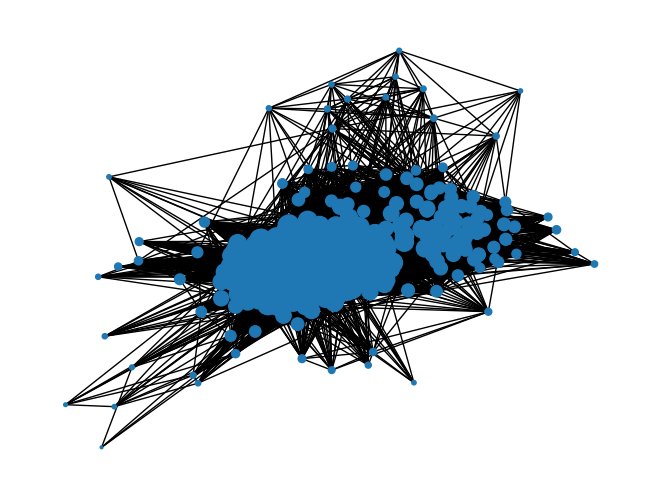

In [27]:
g = nx.Graph()

# Edges list.
edges_list = []

for pairing_key in pairwise_comparisons.keys():
    
    # From where to where?
    start = pairing_key.split('-')[0]
    stop = pairing_key.split('-')[1]
    
    # How many repeats?
    repeat_number = len(pairwise_comparisons[pairing_key])
    
    # Add to the edges list.
    for i in range(0, repeat_number):
        edges_list.append((start, stop))
    
g.add_edges_from(edges_list)

d = dict(g.degree)

nx.draw(g, nodelist=d.keys(), node_size=[v * 1 for v in d.values()])
plt.show()

A bit hard to interpret, so we can instead ask which pathways share the most connections.

# Metrics (pathway)

Recall the available relationships between entities.

In [28]:
relation_types

{'inhibition': '--|',
 'activation': '-->',
 'indirect effect': '..>',
 'expression': '-->',
 'compound': '7',
 'binding/association': '---',
 'phosphorylation': '+p',
 'dissociation': '-+-',
 'missing interaction': '-/-',
 'repression': '--|',
 'dephosphorylation': '-p',
 'glycosylation': '+g',
 'ubiquitination': '+u',
 'indirect': '',
 'state change': '...',
 'methylation': '+m'}

We want the in- and out-degrees for each node.  We will start by processing the KGML files to get the relations between nodes.

In [29]:
# Holds entities by pathway.

# Note that we do not assume that entity
# numbers are shared across pathways.
entity_helper = {}

# Go over every pathway.
for pathway_id in kgmls.keys():
# for pathway_id in ['hsa04062']:
    
    # Create the key.
    entity_helper[pathway_id] = {}
    
    # First, set the keys in the temporary helper.
    for i in kgmls[pathway_id].find_all('entry'):
        
        # Split the name up.  If it's undefined,
        # we have a group.
        split_up = i['name'].split(' ')
        
        if split_up == ['undefined']:
            
            entity_helper[pathway_id][i['id']] = []
            
            # Get the component IDs.
            for x in i.find_all('component'):
                entity_helper[pathway_id][i['id']].append(x['id'])
        
        else:
            
            # Normal name.
            entity_helper[pathway_id][i['id']] = split_up
    
    # Now update entries that were for groups.
    entity_helper_copy = entity_helper.copy()
    
    for k, v in entity_helper[pathway_id].items():
        
        # Nothing to do if the entity is already a
        # known entity.
        if v[0][0] not in ['h', 'p', 'c', 'd', 'k', 'g']:
            
            entity_helper_copy[pathway_id][k] = []
            
            for m in v:
                for n in entity_helper[pathway_id][m]:
                    entity_helper_copy[pathway_id][k].append(n)

In [30]:
# entity_helper_copy

Now that we have a way to map entities in relations to actual genes, let's work on the relations themselves.  We will not concern ourselves with groupings of entities into named sub-pathways (for example, entities "61", "151", "161", etc... in MAPK pathway in hsa 04062).  Rather, we are only concerned with entity-entity interactions.

See https://www.genome.jp/kegg/xml/docs/ for an explanation on the relation types.

In [31]:
# Relevant first-order entity relations,
# ordered by relevance in constructing the
# relation string.

# We modify the relation string a bit to be
# more directly interpretable by the user.
# We do this by introduce a single letter 
# in the middle of the string (e.g. instead
# of '-->' for activation we have '--A-->').

# TODO: no OrderedDict necessary?
entity_relations = {
    'activation': '--A-->', 
    'expression': '--E-->', 
    'inhibition': '--I--|', 
    'repression': '--R--|', 
    'binding/association': '--B--', 
    'dissociation': '-+-D-+-',
    'state change': '..S..',
    'methylation': '+m',
    'phosphorylation': '+p',
    'glycosylation': '+g',
    'ubiquitination': '+u',
    'dephosphorylation': '-p',
    'indirect effect': '..I..>',
    'indirect': '(I)',
    'missing interaction': '-/-M-/-'
}

# Keep the order.
er_keys = list(entity_relations.keys())

In [32]:
er_keys

['activation',
 'expression',
 'inhibition',
 'repression',
 'binding/association',
 'dissociation',
 'state change',
 'methylation',
 'phosphorylation',
 'glycosylation',
 'ubiquitination',
 'dephosphorylation',
 'indirect effect',
 'indirect',
 'missing interaction']

We can also make a table with the relations.

In [56]:
# Table with entity relations.
relations

table_entity_relations = pd.DataFrame(
    data = {
        'relation': er_keys,
        'text': [entity_relations[i] for i in er_keys]
    }
)

In [57]:
table_entity_relations

,relation,text
0,activation,--A-->
1,expression,--E-->
2,inhibition,--I--|
3,repression,--R--|
4,binding/association,--B--
5,dissociation,-+-D-+-
6,state change,..S..
7,methylation,+m
8,phosphorylation,+p
9,glycosylation,+g


In [33]:
# Holds relations by pathway.
relations_helper = {}

# Go over every pathway.
for pathway_id in kgmls.keys():
    
    # Create the key.
    relations_helper[pathway_id] = []

    # Relations.
    for j in kgmls[pathway_id].find_all('relation'):

        # print(j)

        # For now we will ignore ECrel, PCrel, and maplink
        # relations.

        # TODO: save this information to help the user understand
        # that a relation has been skipped...
        
        # if j['type'] == 'ECrel':
        #     print('ECrel: ', pathway_id)
        # elif j['type'] == 'PCrel':
        #     print('ECrel: ', pathway_id)
        # elif j['type'] == 'maplink':
        #     print('maplink: ', pathway_id)

        if j['type'] not in ['ECrel', 'PCrel', 'maplink']:

            # For now, only keep entity-entity interactions,
            # and ignore entity groupings.
            try:
                
                # Get the types of relations.
                all_subtypes = j.find_all('subtype')

                # TODO: add support for compounds...
                try:

                    # Create a list to hold the edge string,
                    # using the necessary keys from entity_relations.
                    edge_string = [er_keys.index(st['name']) for st in all_subtypes]
                    edge_string.sort()
    
                    # Now the actual string.
                    edge_string = (j['entry1'], ''.join([entity_relations[er_keys[i]] for i in edge_string]), j['entry2'])

                    # Save the edge.
                    relations_helper[pathway_id].append(edge_string)

                except ValueError:

                    # Compound...
                    pass
    
            except TypeError:
    
                # There was no sub-type for the relation.
                pass

In [34]:
relations_helper

{'hsa01523': [('127', '--A-->..I..>', '128'),
  ('128', '--E-->', '131'),
  ('128', '--E-->', '130'),
  ('128', '--E-->', '129')],
 'hsa04723': [('25', '--A-->', '26'),
  ('128', '--A-->', '25'),
  ('116', '--A-->', '120'),
  ('120', '--A-->', '165'),
  ('120', '--A-->', '230'),
  ('120', '--I--|', '42'),
  ('120', '--I--|', '174'),
  ('121', '--I--|', '207'),
  ('121', '--I--|', '118'),
  ('117', '--A-->', '121'),
  ('121', '--A-->', '216'),
  ('121', '--A-->', '180'),
  ('240', '', '239'),
  ('246', '--I--|', '238'),
  ('239', '', '245')],
 'hsa00524': [],
 'hsa05212': [('51', '--B--', '4'),
  ('35', '--B--', '52'),
  ('39', '--B--', '40'),
  ('43', '--B--', '44'),
  ('5', '--A-->', '6'),
  ('7', '--A-->', '9'),
  ('9', '--A-->', '11'),
  ('10', '--A-->', '11'),
  ('5', '--A-->', '14'),
  ('5', '--A-->', '18'),
  ('18', '--A-->', '19'),
  ('19', '--A-->', '20'),
  ('19', '--A-->', '21'),
  ('23', '--A-->', '51'),
  ('24', '--A-->', '51'),
  ('27', '--A-->', '30'),
  ('156', '--A-->',

We can perform a simple degree analysis using what we've just made.

In [35]:
# Holds degrees by pathway.
degrees_helper = {}

# Keep track of unique relations.
unique_relations = []

In [36]:
# Go over every pathway.
for pathway_id, relations in relations_helper.items():
    
    # Create the key.
    degrees_helper[pathway_id] = {}

    # Relations.
    for rel in relations:

        # Identify the source, relation, and target.
        source = rel[0]
        rltn = rel[1]
        target= rel[2]

        # A new relation?
        if rltn not in unique_relations:
            if rltn == '':

                # Apparently pathway hsa04723 has a 
                # faulty entry...
                break

            else:
                unique_relations.append(rltn)

        # Add these to the dictionary.
        if source not in degrees_helper[pathway_id]:
            degrees_helper[pathway_id][source] = {
                'in': {},
                'out': {}
            }

        if target not in degrees_helper[pathway_id]:
            degrees_helper[pathway_id][target] = {
                'in': {},
                'out': {}
            }

        if rltn not in degrees_helper[pathway_id][source]['in']:
            degrees_helper[pathway_id][source]['in'][rltn] = 0

        if rltn not in degrees_helper[pathway_id][source]['out']:
            degrees_helper[pathway_id][source]['out'][rltn] = 0

        if rltn not in degrees_helper[pathway_id][target]['in']:
            degrees_helper[pathway_id][target]['in'][rltn] = 0

        if rltn not in degrees_helper[pathway_id][target]['out']:
            degrees_helper[pathway_id][target]['out'][rltn] = 0

        # Now add.
        degrees_helper[pathway_id][source]['out'][rltn] += 1
        degrees_helper[pathway_id][target]['in'][rltn] += 1

Let's see all the possible edge types.

In [37]:
unique_relations

['--A-->..I..>',
 '--E-->',
 '--A-->',
 '--I--|',
 '--B--',
 '--A-->+p',
 '--I--|+p',
 '-+-D-+-',
 '-+-D-+--/-M-/-',
 '..I..>',
 '-/-M-/-',
 '--R--|',
 '--A-->-p',
 '--I--|-p',
 '--I--|..I..>',
 '--I--|-p..I..>',
 '--I--|+g',
 '+g',
 '--I--|+u',
 '--A-->(I)',
 '--A-->+u',
 '--I--|(I)',
 '--A-->+p(I)',
 '--E-->(I)',
 '--A-->--B--',
 '--E-->..I..>',
 '+u',
 '--B---/-M-/-',
 '--E-->-/-M-/-',
 '--I--|-/-M-/-',
 '--E-->--I--|',
 '+p..I..>',
 '+p',
 '--A-->+p..I..>',
 '..S..',
 '--A-->--I--|',
 '--B--..I..>',
 '--I--|--B--',
 '--R--|..I..>',
 '-p',
 '--A-->+m',
 '--I--|+m',
 '--A-->-+-D-+-',
 '--I--|--R--|',
 '--A-->--B--+p',
 '..S..+p']

In [38]:
# print(json.dumps(degrees_helper, sort_keys = True, indent = 4))

We can also invert the above list to get entities by relation type.

In [39]:
# Invert the above.
degrees_helper_inversion = {}

# Set the keys.
for pathway_id in degrees_helper.keys():
    
    degrees_helper_inversion[pathway_id] = {}
    
    for k in unique_relations:
        degrees_helper_inversion[pathway_id][k] = {
            'in': [],
            'out': []
        }

# Go over the entities.
for pathway_id, info in degrees_helper.items():
    for ntty, sub_info in  info.items():
        for degree_type, sub_sub_info in sub_info.items():
            for specific_relation, sub_sub_sub_info in sub_sub_info.items():
                degrees_helper_inversion[pathway_id][specific_relation][degree_type].append(ntty)

In [40]:
degrees_helper_inversion

{'hsa01523': {'--A-->..I..>': {'in': ['127', '128'], 'out': ['127', '128']},
  '--E-->': {'in': ['128', '131', '130', '129'],
   'out': ['128', '131', '130', '129']},
  '--A-->': {'in': [], 'out': []},
  '--I--|': {'in': [], 'out': []},
  '--B--': {'in': [], 'out': []},
  '--A-->+p': {'in': [], 'out': []},
  '--I--|+p': {'in': [], 'out': []},
  '-+-D-+-': {'in': [], 'out': []},
  '-+-D-+--/-M-/-': {'in': [], 'out': []},
  '..I..>': {'in': [], 'out': []},
  '-/-M-/-': {'in': [], 'out': []},
  '--R--|': {'in': [], 'out': []},
  '--A-->-p': {'in': [], 'out': []},
  '--I--|-p': {'in': [], 'out': []},
  '--I--|..I..>': {'in': [], 'out': []},
  '--I--|-p..I..>': {'in': [], 'out': []},
  '--I--|+g': {'in': [], 'out': []},
  '+g': {'in': [], 'out': []},
  '--I--|+u': {'in': [], 'out': []},
  '--A-->(I)': {'in': [], 'out': []},
  '--A-->+u': {'in': [], 'out': []},
  '--I--|(I)': {'in': [], 'out': []},
  '--A-->+p(I)': {'in': [], 'out': []},
  '--E-->(I)': {'in': [], 'out': []},
  '--A-->--B--':

If we'd like, we can also get the sums.

In [41]:
# The sums.
degrees_helper_inversion_sums = copy.deepcopy(degrees_helper_inversion)

# Sum in the inversion dictionary.
for pathway_id, info in degrees_helper_inversion_sums.items():
    for specific_relation, sub_info in info.items():
        for degree_type, entities in sub_info.items():
            degrees_helper_inversion_sums[pathway_id][specific_relation][degree_type] = len(degrees_helper_inversion_sums[pathway_id][specific_relation][degree_type])

In [42]:
degrees_helper_inversion_sums

{'hsa01523': {'--A-->..I..>': {'in': 2, 'out': 2},
  '--E-->': {'in': 4, 'out': 4},
  '--A-->': {'in': 0, 'out': 0},
  '--I--|': {'in': 0, 'out': 0},
  '--B--': {'in': 0, 'out': 0},
  '--A-->+p': {'in': 0, 'out': 0},
  '--I--|+p': {'in': 0, 'out': 0},
  '-+-D-+-': {'in': 0, 'out': 0},
  '-+-D-+--/-M-/-': {'in': 0, 'out': 0},
  '..I..>': {'in': 0, 'out': 0},
  '-/-M-/-': {'in': 0, 'out': 0},
  '--R--|': {'in': 0, 'out': 0},
  '--A-->-p': {'in': 0, 'out': 0},
  '--I--|-p': {'in': 0, 'out': 0},
  '--I--|..I..>': {'in': 0, 'out': 0},
  '--I--|-p..I..>': {'in': 0, 'out': 0},
  '--I--|+g': {'in': 0, 'out': 0},
  '+g': {'in': 0, 'out': 0},
  '--I--|+u': {'in': 0, 'out': 0},
  '--A-->(I)': {'in': 0, 'out': 0},
  '--A-->+u': {'in': 0, 'out': 0},
  '--I--|(I)': {'in': 0, 'out': 0},
  '--A-->+p(I)': {'in': 0, 'out': 0},
  '--E-->(I)': {'in': 0, 'out': 0},
  '--A-->--B--': {'in': 0, 'out': 0},
  '--E-->..I..>': {'in': 0, 'out': 0},
  '+u': {'in': 0, 'out': 0},
  '--B---/-M-/-': {'in': 0, 'out': 0}

Lastly, we can repeat all of the above, but using the actual entities involved in the pathways instead of the entity(ies) identifiers from the KGML files.

Create a few DataFrames to hold this information, as these are more easily queried.

In [43]:
# To DataFrames.
degrees_helper_pathways = []
degrees_helper_entities = []
degrees_helper_in_out_types = []
degrees_helper_relations = []
degrees_helper_counts = []

# Go over everything.
for pathway_id, entity_id in degrees_helper.items():
    for eid, degree_type in entity_id.items():
        for dt, relation in degree_type.items():
            for rltn, count in relation.items():

                # Save it.
                degrees_helper_pathways.append(pathway_id)
                degrees_helper_entities.append(eid)
                degrees_helper_in_out_types.append(dt)
                degrees_helper_relations.append(rltn)
                degrees_helper_counts.append(count)

degrees_helper_dataframe = pd.DataFrame(
    data = {
        'pathway_id': degrees_helper_pathways,
        'entity': degrees_helper_entities,
        'in_out_type': degrees_helper_in_out_types,
        'relation': degrees_helper_relations,
        'count': degrees_helper_counts
    }
)

In [44]:
degrees_helper_dataframe

,pathway_id,entity,in_out_type,relation,count
0,hsa01523,127,in,--A-->..I..>,0
1,hsa01523,127,out,--A-->..I..>,1
2,hsa01523,128,in,--A-->..I..>,1
3,hsa01523,128,in,--E-->,0
4,hsa01523,128,out,--A-->..I..>,0
...,...,...,...,...,...
32039,hsa05145,42,out,--E-->,0
32040,hsa05145,45,in,--R--|..I..>,1
32041,hsa05145,45,in,--E-->..I..>,2
32042,hsa05145,45,out,--R--|..I..>,0


Check for a specific pathway and entities.

In [71]:
# degrees_helper_dataframe[(degrees_helper_dataframe.pathway_id == 'hsa04010') & (degrees_helper_dataframe.entity.any(['52']))]
degrees_helper_dataframe[(degrees_helper_dataframe.pathway_id == 'hsa04010') & (degrees_helper_dataframe['entity'].isin(['118', '119', '126']))]

,pathway_id,entity,in_out_type,relation,count
28444,hsa04010,119,in,--B--,1
28445,hsa04010,119,in,+p,2
28446,hsa04010,119,in,--I--|+p,0
28447,hsa04010,119,in,--I--|-p,2
28448,hsa04010,119,in,--I--|,2
28449,hsa04010,119,out,--B--,2
28450,hsa04010,119,out,+p,4
28451,hsa04010,119,out,--I--|+p,2
28452,hsa04010,119,out,--I--|-p,0
28453,hsa04010,119,out,--I--|,0


In [45]:
# To DataFrames.
degrees_helper_inversion_pathways = []
degrees_helper_inversion_relations = []
degrees_helper_inversion_in_out_types = []
degrees_helper_inversion_entities = []

# Go over everything.
for pathway_id, relation in degrees_helper_inversion.items():
    for rltn, degree_type in relation.items():
        for dt, entity in degree_type.items():
            for ntty in entity:

                # Save it.
                degrees_helper_inversion_pathways.append(pathway_id)
                degrees_helper_inversion_relations.append(rltn)
                degrees_helper_inversion_in_out_types.append(dt)
                degrees_helper_inversion_entities.append(ntty)

degrees_helper_inversion_dataframe = pd.DataFrame(
    data = {
        'pathway_id': degrees_helper_inversion_pathways,
        'relation': degrees_helper_inversion_relations,
        'in_out_type': degrees_helper_inversion_in_out_types,
        'entity': degrees_helper_inversion_entities
    }
)

In [46]:
degrees_helper_inversion_dataframe[degrees_helper_inversion_dataframe.relation == '--B--']

,pathway_id,relation,in_out_type,entity
106,hsa05212,--B--,in,51
107,hsa05212,--B--,in,4
108,hsa05212,--B--,in,35
109,hsa05212,--B--,in,52
110,hsa05212,--B--,in,39
...,...,...,...,...
31989,hsa05145,--B--,out,129
31990,hsa05145,--B--,out,130
31991,hsa05145,--B--,out,200
31992,hsa05145,--B--,out,199


Note that degrees_helper_dataframe can be created from degrees_helper_inversion_dataframe.

### Directed graphs and causality diagrams

Now we can construct the directed graphs, the first step in the overall pathway analysis.  These are found by creating *causality diagrams*, which show the causality of interactions among entities in a pathway or sub-pathway.

Recall that we have already found nodes and edges.

In [47]:
relations_helper

{'hsa01523': [('127', '--A-->..I..>', '128'),
  ('128', '--E-->', '131'),
  ('128', '--E-->', '130'),
  ('128', '--E-->', '129')],
 'hsa04723': [('25', '--A-->', '26'),
  ('128', '--A-->', '25'),
  ('116', '--A-->', '120'),
  ('120', '--A-->', '165'),
  ('120', '--A-->', '230'),
  ('120', '--I--|', '42'),
  ('120', '--I--|', '174'),
  ('121', '--I--|', '207'),
  ('121', '--I--|', '118'),
  ('117', '--A-->', '121'),
  ('121', '--A-->', '216'),
  ('121', '--A-->', '180'),
  ('240', '', '239'),
  ('246', '--I--|', '238'),
  ('239', '', '245')],
 'hsa00524': [],
 'hsa05212': [('51', '--B--', '4'),
  ('35', '--B--', '52'),
  ('39', '--B--', '40'),
  ('43', '--B--', '44'),
  ('5', '--A-->', '6'),
  ('7', '--A-->', '9'),
  ('9', '--A-->', '11'),
  ('10', '--A-->', '11'),
  ('5', '--A-->', '14'),
  ('5', '--A-->', '18'),
  ('18', '--A-->', '19'),
  ('19', '--A-->', '20'),
  ('19', '--A-->', '21'),
  ('23', '--A-->', '51'),
  ('24', '--A-->', '51'),
  ('27', '--A-->', '30'),
  ('156', '--A-->',

In essence what we do now is go through each pathway, create a digraph (which itself may be split into sub-digraphs), and find causality graphs.

Begin by finding the digraphs and the sub-digraphs.

In [48]:
# The digraphs.
digraphs = {}

In [49]:
# Go over each pathway.
for pathway_id, edges in relations_helper.items():

    # Create the keys.
    digraphs[pathway_id] = {
        'main': '',
        'subs': {}
    }
    
    # Begin by creating all of the nodes and then
    # building a NetworkX object.
    
    # Source: https://networkx.org/documentation/stable/reference/classes/digraph.html
    G = nx.DiGraph()

    # Add the edges.
    for edge in edges:
        G.add_edge(
            edge[0], edge[2],
            relation = edge[1]
        )

    # Save the main graph.
    digraphs[pathway_id]['main'] = G

    # Now find the sub-digraphs.
    
    # Make an undirected copy of the digraph.
    
    # Note that we LOSE directional information
    # by doing this.
    
    # Source: https://stackoverflow.com/a/21751571
    UG = G.to_undirected().copy()
    
    # Get the components of each sub-graph.
    # Source: https://stackoverflow.com/a/61537932
    components = [UG.subgraph(c).copy() for c in nx.connected_components(UG)]
    
    # Now that we know which nodes are in which
    # sub-graph, we need to re-construct the directional
    # graphs, keeping them separate.    
    for idx, UG in enumerate(components, start=1):
        
        # Add the key.
        # print(f"Component {idx}: Nodes: {UG.nodes()} Edges: {UG.edges()}")
        digraphs[pathway_id]['subs']['-'.join(list(UG.nodes()))] = G.subgraph(UG.nodes()).copy()

Spot check...

In [50]:
# digraphs

In [51]:
# nx.draw(digraphs['hsa04723']['main'])
# plt.show()

# print('====================')

# nx.draw(digraphs['hsa04723']['subs'][list(digraphs['hsa04723']['subs'].keys())[0]])
# plt.show()

We can now make the causality diagrams.

In [52]:
# A dictionary to hold causality diagrams.
causality_diagrams = {}

# Every pathway.
for pathway_id, dgrphs in digraphs.items():

    # Create the key.
    causality_diagrams[pathway_id] = {}

    # Select the digraphs.
    selected_digraphs = dgrphs['subs']

    # Go over every node of every sub-digraph.
    for sub_graph_id, sub_graph in selected_digraphs.items():

        # Create the key.
        causality_diagrams[pathway_id][sub_graph_id] = []
    
        # Go over every descendant of every node.
        for i in list(sub_graph.nodes):
            for j in nx.descendants(sub_graph, i):
    
                # Find every path to this descendant.
                for path in nx.all_simple_paths(sub_graph, i, j):
    
                    # Create  a list which will hold the relations.
                    rltns = []
    
                    for y in range(0, len(path) - 1):
    
                        # Get the relations between nodes.
                        for z in list(sub_graph.edges(data=True)):
    
                            if z[0] == path[y] and z[1] == path[y + 1]:
    
                                # Add the relation.
                                rltns.append(z[2]['relation'])
                                break
                    
                    # Grow a list to make the nodes and relations
                    # and create the key.
                    
                    # Source: https://stackoverflow.com/a/21482016
                    causal_temp = [x for x in itertools.chain.from_iterable(itertools.zip_longest(list(path), rltns)) if x]
                    causality_diagrams[pathway_id][sub_graph_id].append(causal_temp)

Spot check...

In [53]:
causality_diagrams['hsa04723']

{'25-128-26': [['25', '--A-->', '26'],
  ['128', '--A-->', '25'],
  ['128', '--A-->', '25', '--A-->', '26']],
 '116-120-42-174-230-165': [['116', '--A-->', '120'],
  ['116', '--A-->', '120', '--I--|', '42'],
  ['116', '--A-->', '120', '--I--|', '174'],
  ['116', '--A-->', '120', '--A-->', '230'],
  ['116', '--A-->', '120', '--A-->', '165'],
  ['120', '--I--|', '42'],
  ['120', '--A-->', '230'],
  ['120', '--I--|', '174'],
  ['120', '--A-->', '165']],
 '216-180-118-207-117-121': [['121', '--I--|', '207'],
  ['121', '--A-->', '180'],
  ['121', '--I--|', '118'],
  ['121', '--A-->', '216'],
  ['117', '--A-->', '121'],
  ['117', '--A-->', '121', '--A-->', '216'],
  ['117', '--A-->', '121', '--A-->', '180'],
  ['117', '--A-->', '121', '--I--|', '118'],
  ['117', '--A-->', '121', '--I--|', '207']],
 '239-245-240': [['239', '245'], ['240', '239'], ['240', '239', '245']],
 '238-246': [['246', '--I--|', '238']]}

Out of curiosity, which pathways have the longest causality diagrams?

In [54]:
# Longest causality diagram?
max_length = 0
max_pathway_id = ''
max_pathway = []
max_pathway_joined = ''

for pathway_id, sub_id in causality_diagrams.items():
    for si, sub_pathways in sub_id.items():
        for i in sub_pathways:
            if len(i) > max_length:
                max_length = len(i)
                max_pathway_id = pathway_id
                max_pathway = i                
                max_pathway_joined = ' '.join(i)              

In [55]:
print(max_length)
print(max_pathway_id)
print(max_pathway)
print(max_pathway_joined)

31
hsa04722
['31', '--A-->--B--', '4', '--A-->+p', '96', '--B--', '55', '--B--', '56', '--A-->', '57', '--A-->', '59', '--A-->', '35', '--A-->+p', '52', '--I--|+p', '34', '--A-->..I..>', '141', '--A-->+p', '136', '--A-->+p', '137', '--A-->+p', '53', '--A-->+p', '69', '--E-->', '180']
31 --A-->--B-- 4 --A-->+p 96 --B-- 55 --B-- 56 --A--> 57 --A--> 59 --A--> 35 --A-->+p 52 --I--|+p 34 --A-->..I..> 141 --A-->+p 136 --A-->+p 137 --A-->+p 53 --A-->+p 69 --E--> 180


# TODO START

How about the degrees?  We need to adjust them to remove the in- and out-relations from the causality diagrams.

In [ ]:
# Make a copy of the pathways so we 
# can edit them.
degrees_helper_copy = copy.deepcopy(degrees_helper)

print(json.dumps(degrees_helper_copy['hsa04722'], sort_keys = True, indent = 4))

In [ ]:
for pathway_id, sub_id in causality_diagrams.items():

    print(pathway_id)
    
    for si, sub_pathways in sub_id.items():
        for a in sub_pathways:

            print(a)

            # Some "pathways" are actually groupings of
            # entities, so we will skip those.

            try:
                
                [int(d) for d in a]

            except ValueError:

                # Go over the entities.
                for i in range(0, len(a), 2):
                
                    # Get the entity.
                    entity = a[i]
    
                    print(entity)
                
                    # Get the incoming and outgoing relations.
                    if i == 0:
                        
                        # First entry in the diagram.
                        outgoing_relation = a[i + 1]
                
                        # Set the degree.
                        degrees_helper_copy[pathway_id][entity]['out'][outgoing_relation] -= 1 
                        
                    elif i == (len(a) - 1):
                
                        # Last entry in the diagram.
                        incoming_relation = a[-2]
                
                        # Set the degree.
                        degrees_helper_copy[pathway_id][entity]['in'][incoming_relation] -= 1 
                        
                    else:
                        
                        # "Regular" entry in the diagram.
                        incoming_relation = a[i - 1]
                        outgoing_relation = a[i + 1]
                
                        # Set the degree.
                        degrees_helper_copy[pathway_id][entity]['in'][incoming_relation] -= 1
                        degrees_helper_copy[pathway_id][entity]['out'][outgoing_relation] -= 1

In [ ]:
print(json.dumps(degrees_helper_copy['hsa04722'], sort_keys = True, indent = 4))

In [ ]:
degrees_helper_copy['hsa04723']

# TODO STOP

# Gene mapping to entities

We will map gene names to entities, which will allow us to properly query the causality diagrams.  This isn't necessarily hard logically, but is computationally expensive.

Create a dictionary to hold the causality diagrams by gene.

In [ ]:
# Causality diagrams by gene.
causality_diagrams_by_gene = {}

Now go over every pathway and map.

In [ ]:
# Every pathway.
for pathway_id, info in causality_diagrams.items():

    print(pathway_id)
    
    # Only first 10 pathways...
    if pathway_id not in list(causality_diagrams.keys())[0:10]:
        break

    # Create the key.
    causality_diagrams_by_gene[pathway_id] = {}
    
    for entity_id_string, pathways in info.items():

        # Create the key.
        causality_diagrams_by_gene[pathway_id][entity_id_string] = []

        # Identify which genes we are working with.
        split_up = entity_id_string.split('-')
        pathway_entities = [entity_helper_copy[pathway_id][k] for k in split_up]
        
        #print(split_up)
        #print(pathway_entities)
        
        # Cartesian product of the entities.
        # Source: https://stackoverflow.com/a/798893
        pathway_entities = list(itertools.product(*pathway_entities))

        #print(pathway_entities)
        #print('-----------')

        # Simply create a dictionary for every entry
        # in pathway_entities.
        for pw in pathway_entities:

            # Temp dictionary.
            temp_dictionary = {}

            for su_index in range(0, len(split_up)):
                temp_dictionary[split_up[su_index]] = pw[su_index]

            #print(temp_dictionary)

            # Go over the pathways.
            for pway in pathways:

                #print(pway)

                # Temp list.
                temp_list = []

                # Go over the entities.
                for e in pway:
                    if e in temp_dictionary:
                        temp_list.append(temp_dictionary[e])
                    else:
                        temp_list.append(e)

                #print(temp_list)

                # Save it.
                causality_diagrams_by_gene[pathway_id][entity_id_string].append(temp_list)
        
        #print(causality_diagrams_by_gene)
        #print(asdfa)
        
        #pathway_entities = entity_helper_copy[pathway_id]       

In [ ]:
causality_diagrams_by_gene['hsa01523']

Now go over every pathway and map (to file).

In [ ]:
# Open the file and write the pathways.
with open(data_folder + 'kegg_pathways.tsv', 'w') as f:

    # Header.
    f.write('\t'.join(['kegg_pathway_id', 'pathway']) + '\n')

    # Every pathway.
    for pathway_id, info in causality_diagrams.items():
    
        print(pathway_id)
        
        for entity_id_string, pathways in info.items():
    
            # Identify which genes we are working with.
            split_up = entity_id_string.split('-')
            pathway_entities = [entity_helper_copy[pathway_id][k] for k in split_up]
            
            #print(split_up)
            #print(pathway_entities)
            
            # Cartesian product of the entities.
            # Source: https://stackoverflow.com/a/798893
            pathway_entities = list(itertools.product(*pathway_entities))
    
            #print(pathway_entities)
            #print('-----------')
    
            # Simply create a dictionary for every entry
            # in pathway_entities.
            for pw in pathway_entities:
    
                # Temp dictionary.
                temp_dictionary = {}
    
                for su_index in range(0, len(split_up)):
                    temp_dictionary[split_up[su_index]] = pw[su_index]
    
                #print(temp_dictionary)
    
                # Go over the pathways.
                for pway in pathways:
    
                    #print(pway)
    
                    # Temp list.
                    temp_list = []
    
                    # Go over the entities.
                    for e in pway:
                        if e in temp_dictionary:
                            temp_list.append(temp_dictionary[e])
                        else:
                            temp_list.append(e)
    
                    #print(temp_list)

                    # Write it.
                    #print('\t'.join([pathway_id, ' '.join(temp_list)]))
                    # print(asdfas)
                    f.write('\t'.join([pathway_id, ' '.join(temp_list)]) + '\n')
            
            #print(causality_diagrams_by_gene)
            #print(asdfa)
            
            #pathway_entities = entity_helper_copy[pathway_id]       

Suppose we start with a list of genes from the cell cycle (hsa04110), apoptosis (hsa04210), and B cell receptor signaling (hsa04662) pathways.

In [ ]:
# Genes of interest.
genes = ['CDK2', 'WEE', 'CASP3', 'CASP7', 'BTK', 'AKT']

We can conduct a causality analysis to see if the pathway results represent what is expected given a list of genes which have gone up or down between two states or time points.  Note that we can only infer causality for *downregulated* genes using only mRNA expression, but cannot infer causality for *upregulated* genes using only mRNA expression, as we do not have the protein data to confirm that the mRNA is actually translated.

In the future, we will incorporate orthogonal data to help with the analysis.

For now, we will establish the causality chains assuming that down- and upregulation are causal for down and upregulation of protein products.

Recall the available relationships between entities.